# Importing Important libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [4]:
# to read an excel file use read_excel
df = pd.read_excel('Flight Price Prediction.xlsx')

In [5]:
#check first 5 rows 

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Visualization

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

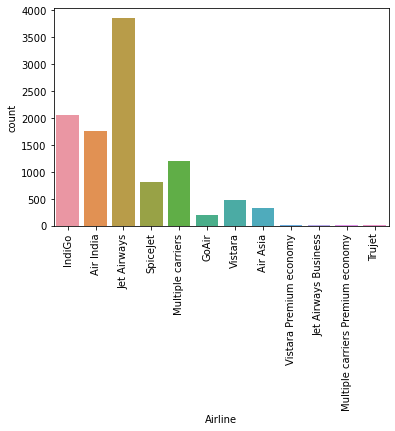

In [10]:
chart=sns.countplot(x='Airline',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Flight Vs Price

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

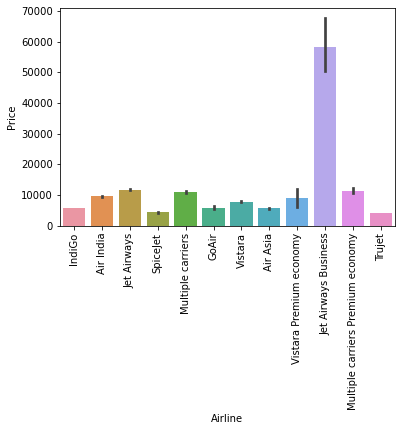

In [11]:
chart=sns.barplot(x='Airline',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

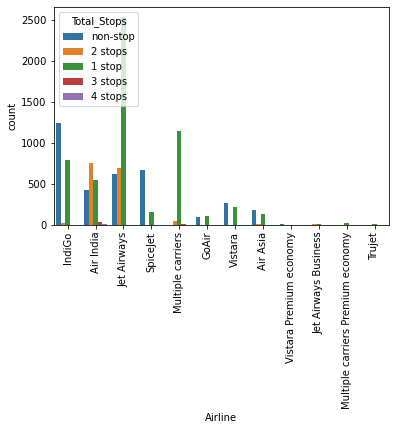

In [12]:
chart=sns.countplot(x='Airline',hue='Total_Stops',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# data type of date of journey 

In [14]:
df['jou_day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['jou_mon'] = pd.DatetimeIndex(df['Date_of_Journey']).month

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

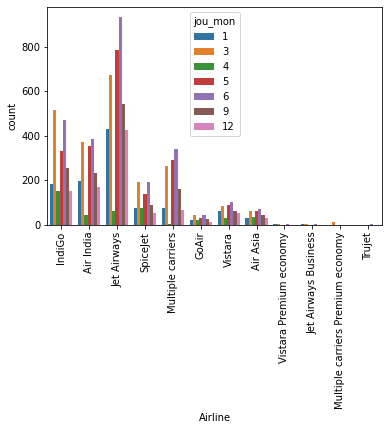

In [15]:
chart=sns.countplot(x='Airline',hue='jou_mon',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='jou_mon', ylabel='Price'>

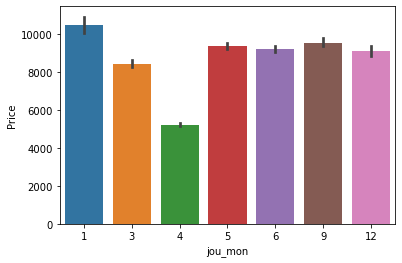

In [16]:
sns.barplot(x='jou_mon',y='Price',data=df)

In [17]:
df['jou_day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['jou_mon'] = pd.DatetimeIndex(df['Date_of_Journey']).month

In [18]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [20]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
df_airline=pd.get_dummies(df.Airline,drop_first=True)

In [24]:
df_airline=df_airline.drop(['Trujet'],axis=1)

In [25]:
df_airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


# similarly for other categorical feature¶


In [26]:
df_source=pd.get_dummies(df.Source,drop_first=True)
print(df_source.head())

df_destination=pd.get_dummies(df.Destination,drop_first=True)
print(df_destination.head())

   Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        1       0
2        0      1        0       0
3        0      0        1       0
4        0      0        0       0
   Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1


In [28]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

df['Total_Stops']=df['Total_Stops'].map(stops)

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,3,1


In [31]:
df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [32]:
df['arr_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [33]:
df.drop(['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [34]:
df.head()

,Total_Stops,Price,jou_day,jou_mon,dep_hour,dep_min,arr_hour,arr_min
0,0.0,3897,24,3,22,20,1,10
1,2.0,7662,5,1,5,50,13,15
2,2.0,13882,6,9,9,25,4,25
3,1.0,6218,5,12,18,5,23,30
4,1.0,13302,3,1,16,50,21,35


In [35]:
df=pd.concat([df,df_airline,df_source,df_destination],axis=1)

In [36]:
df.head()

,Total_Stops,Price,jou_day,jou_mon,dep_hour,dep_min,arr_hour,arr_min,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,5,12,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,3,1,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)


In [91]:
X_train['Total_Stops'] = X_train['Total_Stops'].fillna(0)
X_test['Total_Stops'] = X_test['Total_Stops'].fillna(0)

# Create model

# KNeighborsRegressor

In [92]:
knr=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

In [94]:
y_pred=knr.predict(X_test)

In [95]:
score=r2_score(y_test,y_pred)
score

0.5388268516917162